In [2]:
import cv2
import numpy as np
print(cv2.__version__)

4.6.0


In [18]:
img  = cv2.imread('rice.jpg', cv2.IMREAD_GRAYSCALE)
out_3x3 = cv2.blur(img, (3,3))
out_7x7 = cv2.blur(img, (7,7))
out_gauss_3x3 = cv2.GaussianBlur(img, (3,3), 0)
out_gauss_7x7  = cv2.GaussianBlur(img, (7,7), 0)

k = cv2.getGaussianKernel(7, 0.5)
print(k)

cv2.imshow("image_gray", img)
cv2.imshow("out_3x3", out_3x3)
cv2.imshow("out_7x7", out_7x7)
cv2.imshow("Gauss_3x3", out_gauss_3x3)
cv2.imshow("Gauss_7x7", out_gauss_7x7)
cv2.waitKey(0)
cv2.destroyAllWindows()


[[1.19794559e-08]
 [2.63865076e-04]
 [1.06450769e-01]
 [7.86570707e-01]
 [1.06450769e-01]
 [2.63865076e-04]
 [1.19794559e-08]]


In [23]:
img  = cv2.imread('noise1.jpg', cv2.IMREAD_GRAYSCALE)
out_3x3 = cv2.blur(img, (3,3))
out_7x7 = cv2.blur(img, (7,7))
out_gauss_3x3 = cv2.GaussianBlur(img, (3,3), 0)
out_gauss_7x7  = cv2.GaussianBlur(img, (7,7), 0)
out_me_3x3 = cv2.medianBlur(img, 3)
out_me_7x7 = cv2.medianBlur(img, 7)

# k = cv2.getGaussianKernel(7, 0.5)
# print(k)

cv2.imshow("image_gray", img)
cv2.imshow("out_3x3", out_3x3)
cv2.imshow("out_7x7", out_7x7)
cv2.imshow("Gauss_3x3", out_gauss_3x3)
cv2.imshow("Gauss_7x7", out_gauss_7x7)
cv2.imshow("Median_3x3", out_me_3x3)
cv2.imshow("Median_7x7", out_me_7x7)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [25]:
#morphology 
img  = cv2.imread('Small_holes.jpg', cv2.IMREAD_GRAYSCALE)
threshold = 150
_,img_thre = cv2.threshold(img, threshold,255 , cv2.THRESH_BINARY)

kernel = np.ones((3,3), dtype=np.uint8)
kernel2 =  cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))

out  = cv2.erode(img_thre, kernel=kernel, iterations=5)
out2  = cv2.erode(img_thre, kernel=kernel2, iterations=2)
out3  = cv2.erode(img_thre, kernel=kernel2,anchor=(2,2), iterations=2)

print(kernel2)
cv2.imshow("img", img)
cv2.imshow("out", out)
cv2.imshow("out_2", out2)
cv2.imshow("out_3", out3)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]]


In [30]:
#morphology_Ex
img  = cv2.imread('Small_holes.jpg', cv2.IMREAD_GRAYSCALE)
threshold = 150
_,img_thre = cv2.threshold(img, threshold,255 , cv2.THRESH_BINARY)


kernel2 =  cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))

out_x  = cv2.morphologyEx(img_thre, cv2.MORPH_CLOSE, kernel2, iterations=5)

print(kernel2)
cv2.imshow("img", img)
cv2.imshow("out_x", out_x)

cv2.waitKey(0)
cv2.destroyAllWindows()

[[0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]]


In [36]:

img  = cv2.imread('Salt_noise.jpg', cv2.IMREAD_GRAYSCALE)
threshold = 150
_,img_thre = cv2.threshold(img, threshold,255 , cv2.THRESH_BINARY)


kernel2 =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
out_x  = cv2.morphologyEx(img_thre, cv2.MORPH_OPEn, kernel2, iterations=3)

print(kernel2)
cv2.imshow("img", img)
cv2.imshow("out_x", out_x)

cv2.waitKey(0)
cv2.destroyAllWindows()

[[0 1 0]
 [1 1 1]
 [0 1 0]]


In [185]:
img  = cv2.imread('rice.jpg', cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread('rice.jpg', cv2.IMREAD_COLOR)
out_gauss_3x3 = cv2.GaussianBlur(img, (3,3),0.7)
threshold = 125
b_img = cv2.threshold(out_gauss_3x3,threshold, 255, cv2.THRESH_BINARY)[1]
# kernel2 =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE|, (3,3))
# out_x  = cv2.morphologyEx(b_img, cv2.MORPH_OPEN, kernel2, iterations= 1)
# out_1 = cv2.dilate(b_img, (3,3), iterations=5)
out_r =  cv2.erode(b_img.copy(),(3,3), iterations=4)
out_d = cv2.dilate(out_r, (3,3), iterations=3)
contours = cv2.findContours(out_d.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

import random
# for i in contours:
#     cv2.drawContours(img_color, i, -1, (random.randint(10, 255), random.randint(10, 255), random.randint(10, 255)), 3)
for i, cnt in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img_color, (x,y), (x+w, y+h), (0,255,0))

cv2.imshow("image_gray", img)       
cv2.imshow("Gauss_3x3", out_gauss_3x3)
cv2.imshow("BINARY", b_img)
cv2.imshow("Dilate", out_d)
cv2.imshow("Erode", out_r)
cv2.imshow("color", img_color)

cv2.waitKey(0)
cv2.destroyAllWindows()
print(len(contours))

90


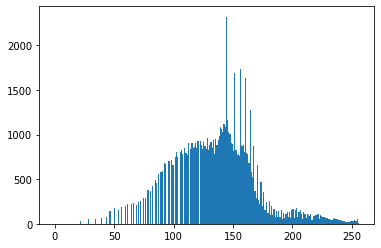

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('10.PNG',cv2.IMREAD_GRAYSCALE)
plt.hist(img.ravel(),256,[0,256])
plt.show()